In [1]:
!which python

/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/bin/python


In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
%matplotlib inline

In [3]:
df = pd.read_csv('processed_data')

In [4]:
df.head()

,uploadstatus,privacystatus,license,embeddable,publicstatsviewable,madeforkids,viewcount,likecount,favoritecount,commentcount,duration,dimension,definition,caption,licensedcontent,contentrating,projection,regionrestriction
0,processed,public,youtube,True,True,False,5392,166,0,1,132,2d,hd,False,True,{},rectangular,NaN
1,processed,public,youtube,True,True,False,3805,102,0,32,1506,2d,hd,False,True,{},rectangular,NaN
2,processed,public,youtube,True,True,False,29986,2171,0,385,636,2d,hd,False,True,{},rectangular,NaN
3,processed,public,youtube,True,True,False,2084,40,0,0,182,2d,hd,False,True,{},rectangular,NaN
4,processed,public,youtube,True,True,False,120380,874,0,3,734,2d,hd,False,True,{},rectangular,NaN


In [5]:
df.tail()

,uploadstatus,privacystatus,license,embeddable,publicstatsviewable,madeforkids,viewcount,likecount,favoritecount,commentcount,duration,dimension,definition,caption,licensedcontent,contentrating,projection,regionrestriction
4533,processed,public,youtube,True,False,False,3838678,73605,0,5021,2082,2d,hd,False,True,{},rectangular,NaN
4534,processed,public,youtube,True,True,False,3807856,113732,0,2315,720,2d,hd,False,True,{},rectangular,NaN
4535,processed,public,youtube,False,True,False,1482434,17484,0,938,822,2d,hd,False,True,{},rectangular,NaN
4536,processed,public,youtube,True,False,False,558352,3410,0,203,179,2d,hd,True,True,{},rectangular,NaN
4537,processed,public,youtube,False,True,False,3626419,18355,0,816,2581,2d,hd,False,True,{},rectangular,NaN


In [6]:
df.shape

(4538, 18)

## Data types

In [7]:
df.dtypes

uploadstatus           object
privacystatus          object
license                object
embeddable               bool
publicstatsviewable      bool
madeforkids              bool
viewcount               int64
likecount               int64
favoritecount           int64
commentcount            int64
duration                int64
dimension              object
definition             object
caption                  bool
licensedcontent          bool
contentrating          object
projection             object
regionrestriction      object
dtype: object

## Observation
- let us convert feature with ***bool*** dtype to object.

In [8]:
for col in ['caption','licensedcontent','madeforkids','publicstatsviewable','embeddable']:
    df[col] = df[col].astype('O')


## Drop duplicates

In [9]:
print(f"no of duplicates records: {df[df.duplicated()].shape}\n")

df = df.drop_duplicates()

print(f"shape after droping duplicates: {df.shape}")


no of duplicates records: (102, 18)

shape after droping duplicates: (4436, 18)


In [10]:
## variance
for col in df.columns:
    print(f"{col}:{df[col].nunique()}")

uploadstatus:2
privacystatus:1
license:2
embeddable:2
publicstatsviewable:2
madeforkids:2
viewcount:4152
likecount:3434
favoritecount:1
commentcount:1579
duration:1618
dimension:1
definition:2
caption:2
licensedcontent:2
contentrating:2
projection:1
regionrestriction:64


## Observation
- Columns `privacystatus`,`favoritecount`,`dimension`,`projection` has 1 unique values which means zero variance and will not contribute to our analysis, hence droping this columns.

In [11]:
## droping columns with zero variance

df.drop(['privacystatus','favoritecount','dimension','projection'],axis=1,inplace=True)

print(f"shape after drop: {df.shape}")

shape after drop: (4436, 14)


In [12]:
def set_labels(title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(7,5))
    plt.title(title,fontdict={'fontsize':15,'fontweight':'bold'})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    

Missing Values: 
uploadstatus           0.000000
license                0.000000
embeddable             0.000000
publicstatsviewable    0.000000
madeforkids            0.000000
viewcount              0.000000
likecount              0.000000
commentcount           0.000000
duration               0.000000
definition             0.000000
caption                0.000000
licensedcontent        0.000000
contentrating          0.000000
regionrestriction      0.809964
dtype: float64


<Axes: title={'center': 'Missing Values'}>

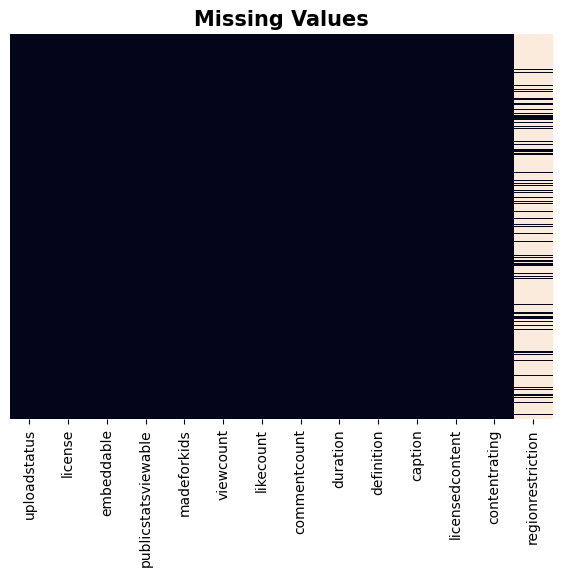

In [13]:
print(f"Missing Values: \n{df.isnull().mean()}")
set_labels("Missing Values")
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)


## Observation 
- column `regionrestriction` has more than 80% missing values, we go ahead and drop this column.

In [14]:
df.drop('regionrestriction',axis=1,inplace=True)

print(f"shape after drop: {df.shape}")

shape after drop: (4436, 13)


## Statistical Analysis

In [15]:
df.describe(percentiles=[.05,.15,.25,.35,.50,.65,.75,.85])

,viewcount,likecount,commentcount,duration
count,4.436000e+03,4.436000e+03,4436.000000,4436.000000
mean,1.046134e+07,9.953822e+04,1596.959648,740.596483
std,7.421434e+07,6.179419e+05,11487.398872,799.172910
min,0.000000e+00,0.000000e+00,0.000000,0.000000
5%,0.000000e+00,1.000000e+00,0.000000,40.750000
15%,1.778775e+04,8.300000e+01,0.000000,123.000000
25%,1.500930e+05,6.547500e+02,0.000000,194.000000
35%,2.353108e+05,1.546500e+03,2.000000,267.000000
50%,5.240370e+05,3.868500e+03,109.000000,439.500000
65%,1.298234e+06,1.049950e+04,365.000000,669.750000


## Observation
- for column `duration` we have some records with value as zero, which does not make sense, hence removing records with value as zero in the `duration` column

In [16]:
print(f'no of record with zero duration time: {df.query(f"duration==0").shape[0]}')

df = df.query(f"duration!=0")

print(f"shape after removal of records: {df.shape}")

no of record with zero duration time: 16
shape after removal of records: (4420, 13)


In [17]:
## categorizing columns as numerical and categorical for further analysis

numerical_columns = [col for col in df.columns if df[col].dtype == 'int64']
categorical_columns = [col for col in df.columns if col not in numerical_columns]

print(f"Numerical columns: \n{numerical_columns}")
print(f"no of numerical columns: {len(numerical_columns)}\n")

print(f"Categorical columns: \n{categorical_columns}")
print(f"no of categorical_columns: {len(categorical_columns)}")


    

Numerical columns: 
['viewcount', 'likecount', 'commentcount', 'duration']
no of numerical columns: 4

Categorical columns: 
['uploadstatus', 'license', 'embeddable', 'publicstatsviewable', 'madeforkids', 'definition', 'caption', 'licensedcontent', 'contentrating']
no of categorical_columns: 9


## EDA
### Categorical Columns

Values count for uploadstatus
processed    1.0
Name: count, dtype: float64


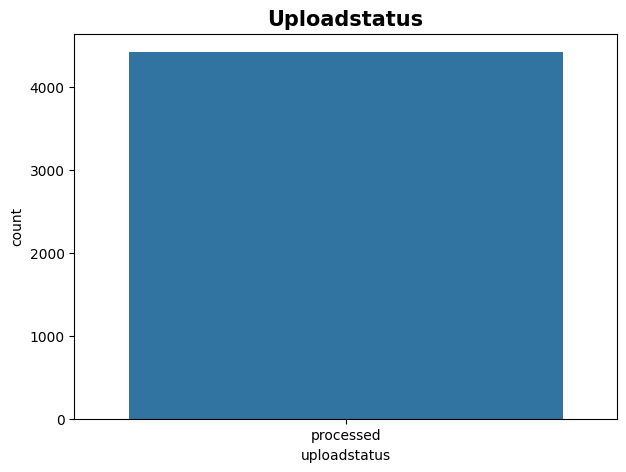

Values count for license
youtube           0.999548
creativeCommon    0.000452
Name: count, dtype: float64


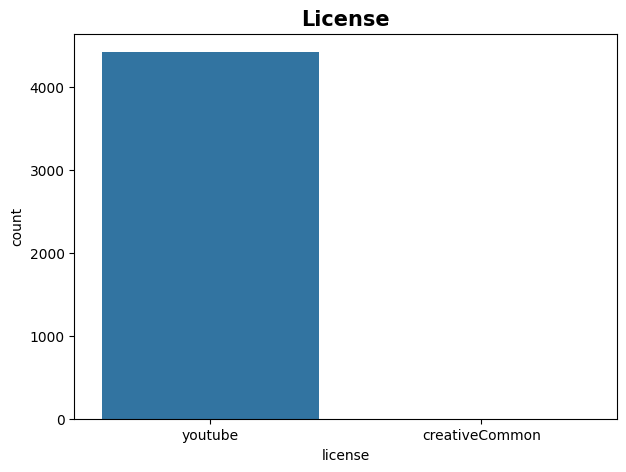

Values count for embeddable
True     0.9681
False    0.0319
Name: count, dtype: float64


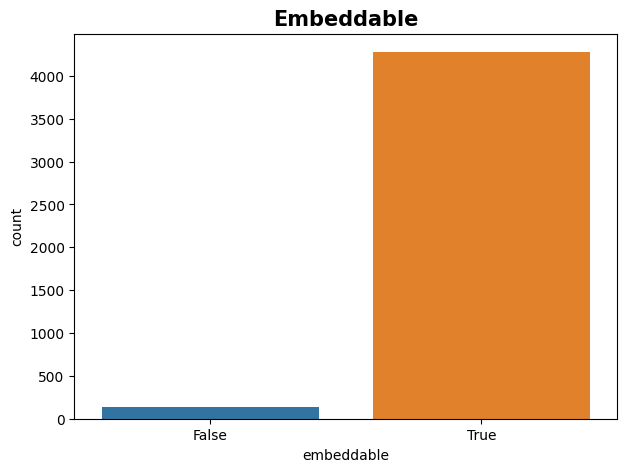

Values count for publicstatsviewable
True     0.845701
False    0.154299
Name: count, dtype: float64


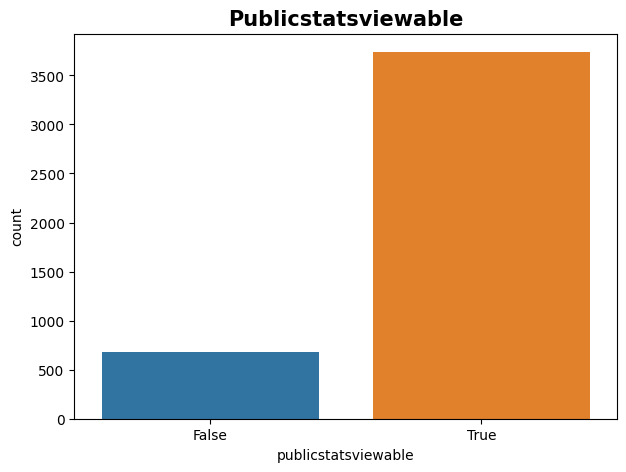

Values count for madeforkids
False    0.812896
True     0.187104
Name: count, dtype: float64


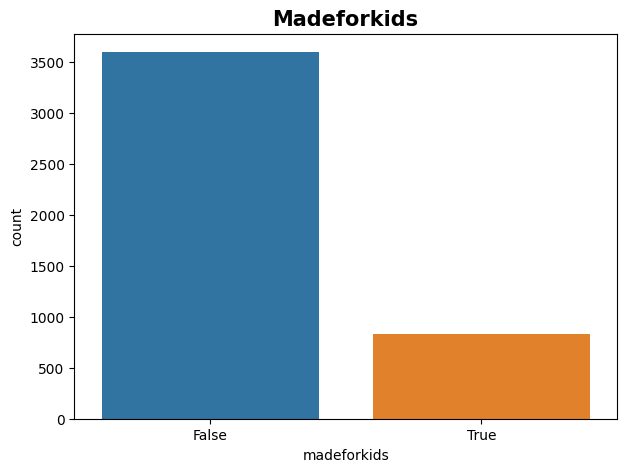

Values count for definition
hd    0.959276
sd    0.040724
Name: count, dtype: float64


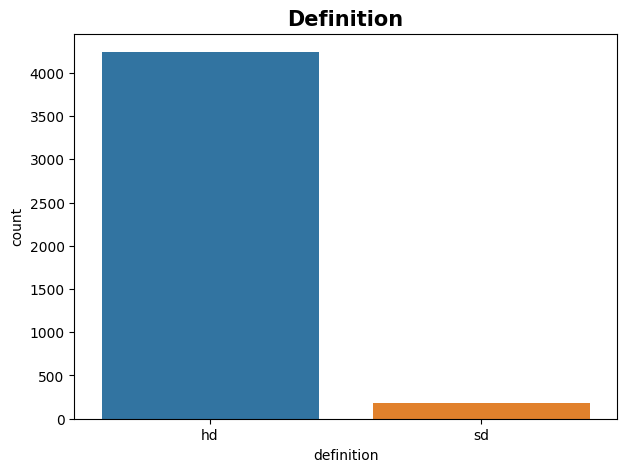

Values count for caption
False    0.74457
True     0.25543
Name: count, dtype: float64


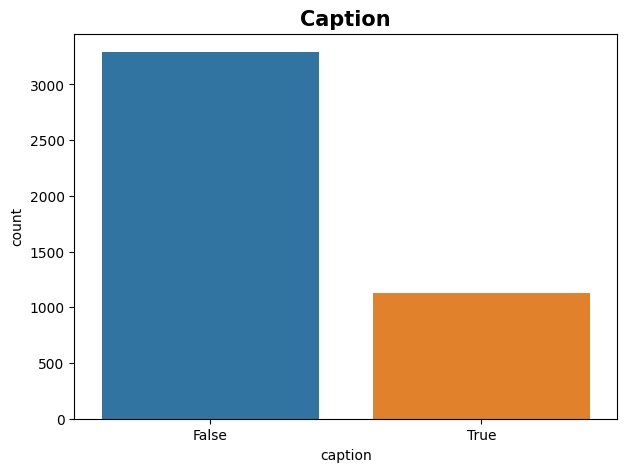

Values count for licensedcontent
True     0.806787
False    0.193213
Name: count, dtype: float64


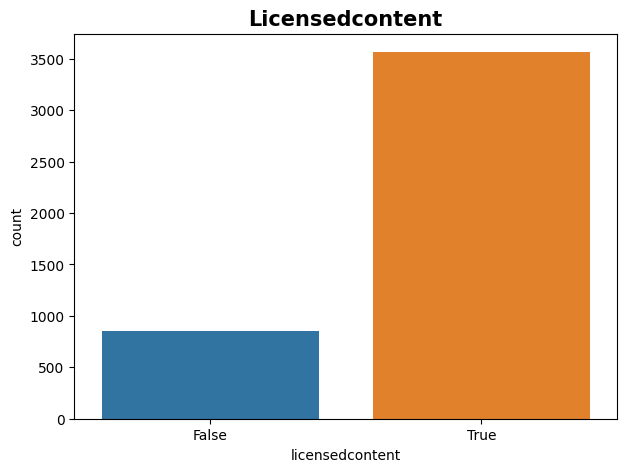

Values count for contentrating
{}                                 0.994344
{'ytRating': 'ytAgeRestricted'}    0.005656
Name: count, dtype: float64


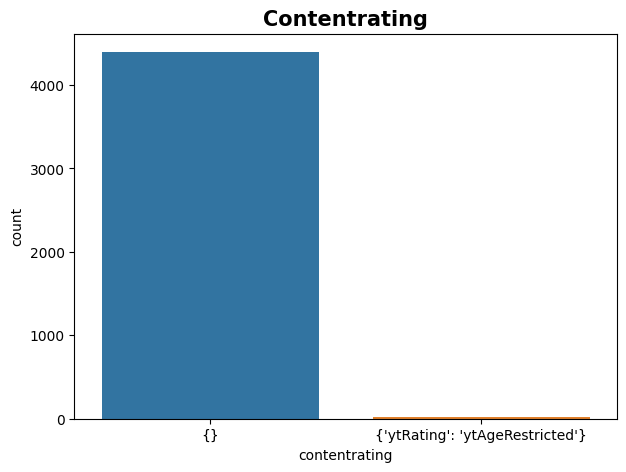

In [18]:
for col in categorical_columns:
    print(f"Values count for {df[col].value_counts()/df.shape[0]}")
    set_labels(title=col.capitalize())
    sns.countplot(x=col,data=df)
    plt.show()

## Observation 
- while some of the feature are interesting here, but then the most of the features are unbalanced with one of the class in majority.

- `contentrating` has only has ***0.56%*** of ***agerestricted*** data points.

- `defination` has ***~96%*** of video as ***hd(high defination)*** and only ***~4%*** as ***sd(standard defination)***.

- `embeddable` has ***~97%*** as True and ***~3%*** as False.

- ***99.95%*** of `license` are from ***youtube*** and only a small amount of ***0.04%*** from ***creativeCommon***. 

- `uploadstatus` has only one class that means zero variance, though in our earlier analysis it had two class but after removal of records with duration=0 it is left with one class.


- We will drop these columns.



In [19]:
def drop_feature(feature,categorical=False):

    """
    function drop column from dataframe and also remove from columns list

    """

    df.drop(feature,axis=1,inplace=True)
    if categorical:
        categorical_columns.remove(feature)
        return None
    numerical_columns.remove(feature)
    return None

In [20]:
df.columns

Index(['uploadstatus', 'license', 'embeddable', 'publicstatsviewable',
       'madeforkids', 'viewcount', 'likecount', 'commentcount', 'duration',
       'definition', 'caption', 'licensedcontent', 'contentrating'],
      dtype='object')

In [21]:
## droping columns from above analysis

unbalanced_cols = ['contentrating','definition','embeddable','license','uploadstatus']
for col in unbalanced_cols:
    drop_feature(feature=col,categorical=True)


print(f"shape after drop: {df.shape}")

shape after drop: (4420, 8)


### Numerical Columns

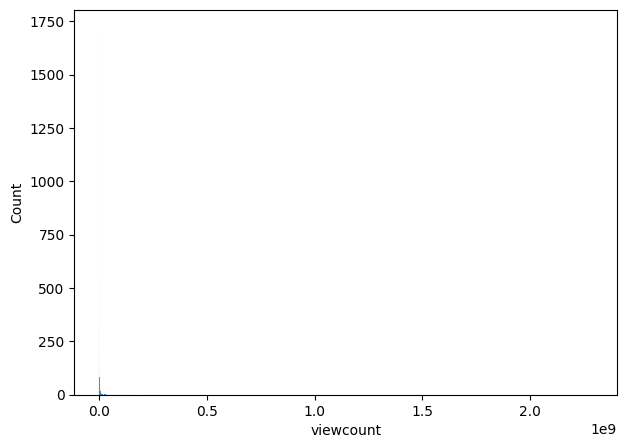

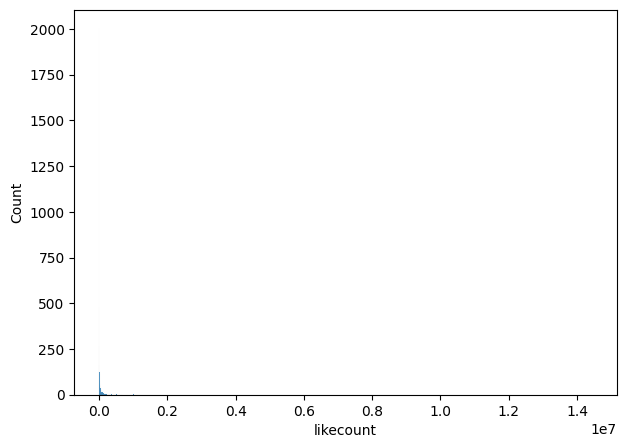

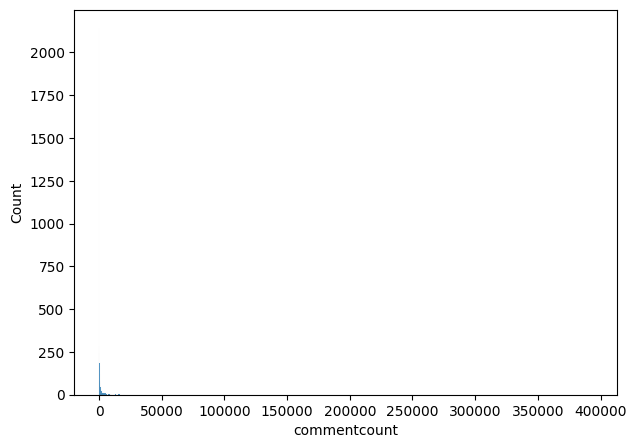

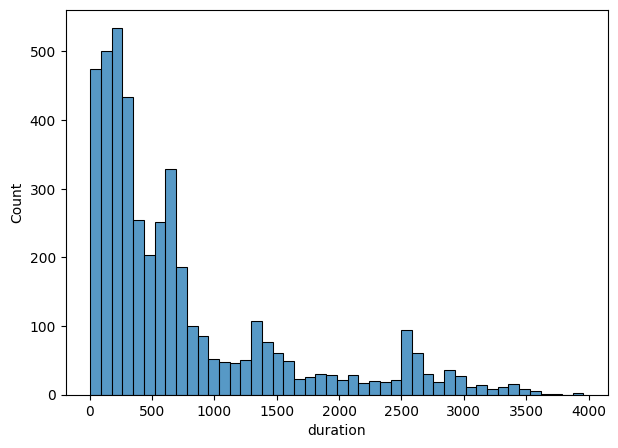

In [22]:
for col in numerical_columns:
    set_labels()
    sns.histplot(data=df,x=col)
    plt.show()

/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/93/mr9vk9s104n71qvsfvrkf4800000gn/T/ipykernel_89437/3732617646.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


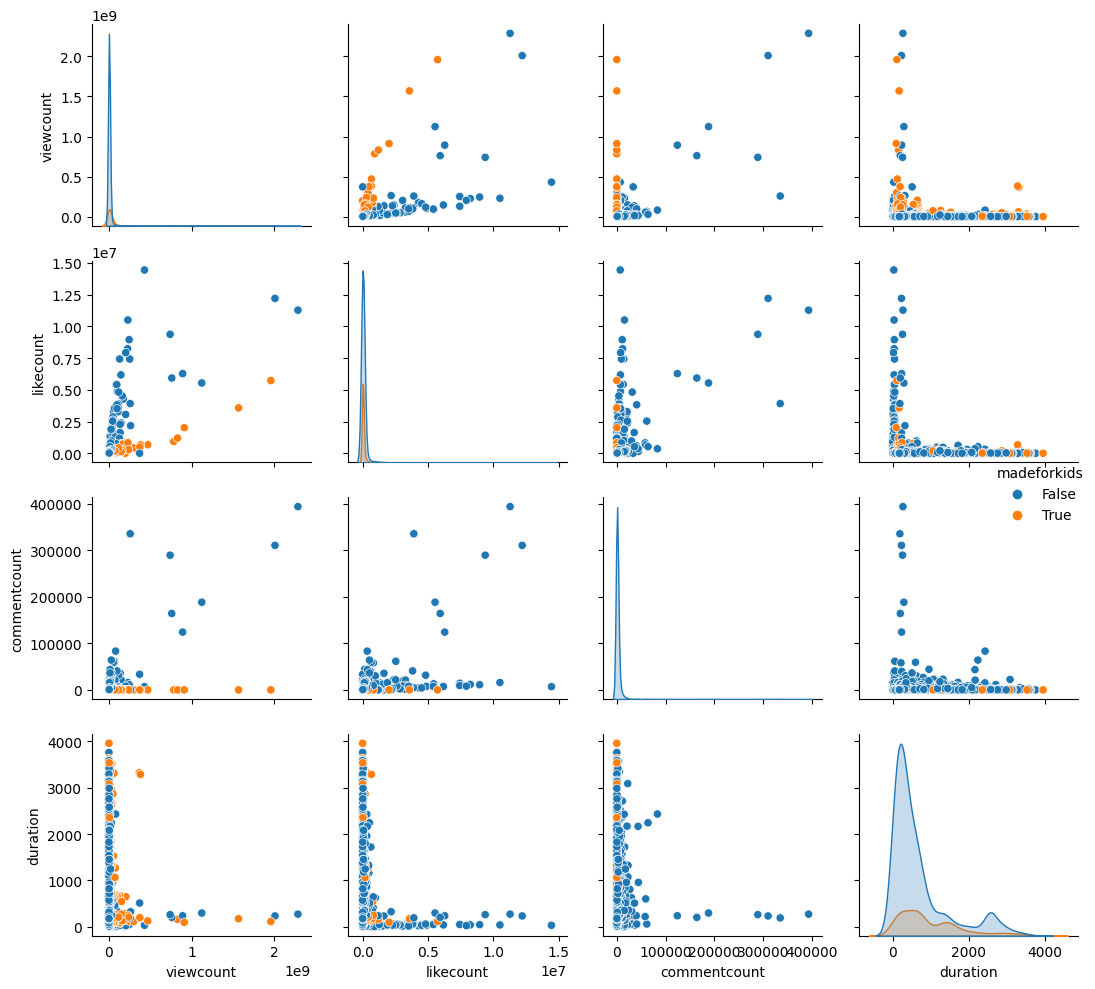

In [23]:

sns.pairplot(df[numerical_columns+['madeforkids']],hue='madeforkids')
plt.tight_layout()

## Observation 
- short videos are more viewed, liked and commented.

## Multivariate Analysis


<Axes: xlabel='viewcount', ylabel='likecount'>

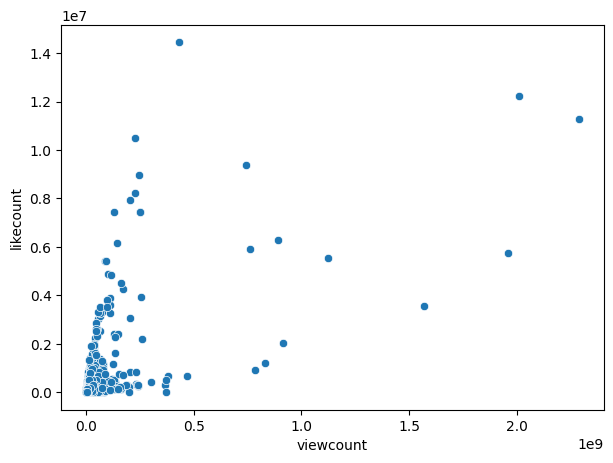

In [24]:
set_labels()
sns.scatterplot(x='viewcount',y='likecount',data=df)

<Axes: xlabel='viewcount', ylabel='commentcount'>

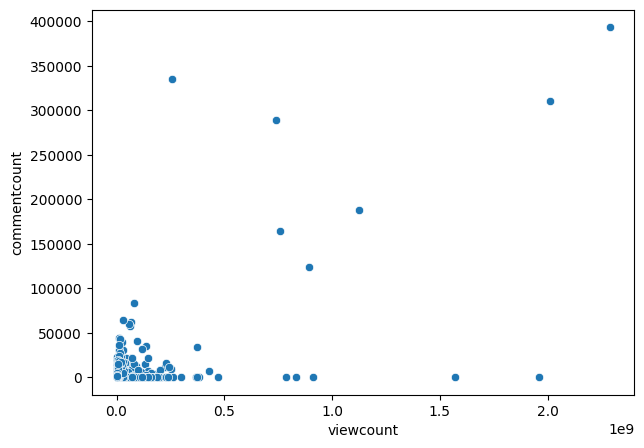

In [25]:
set_labels()
sns.scatterplot(x='viewcount',y='commentcount',data=df)

<Axes: xlabel='commentcount', ylabel='likecount'>

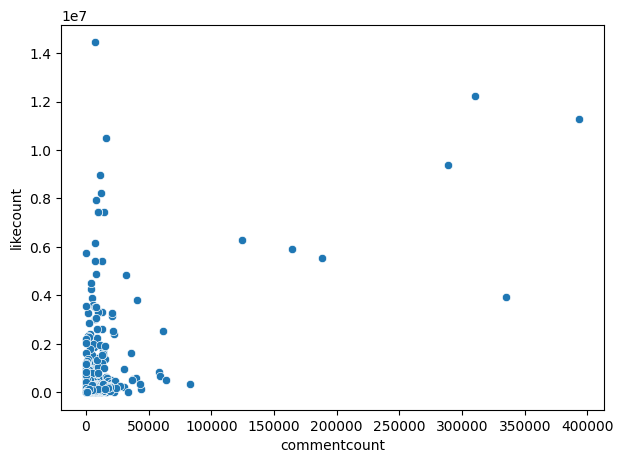

In [26]:
set_labels()
sns.scatterplot(x='commentcount',y='likecount',data=df)

<Axes: xlabel='duration', ylabel='likecount'>

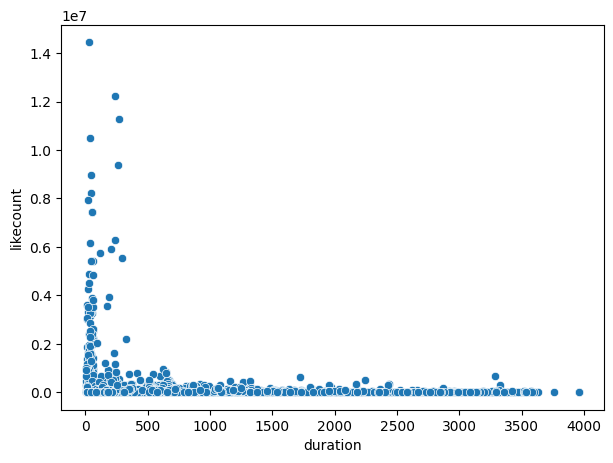

In [27]:
set_labels()
sns.scatterplot(x='duration',y='likecount',data=df)

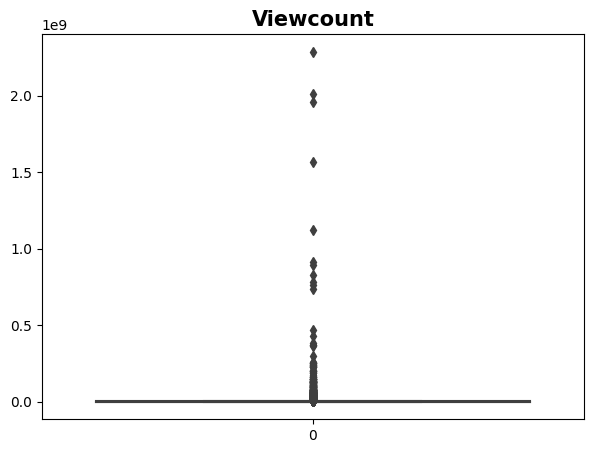

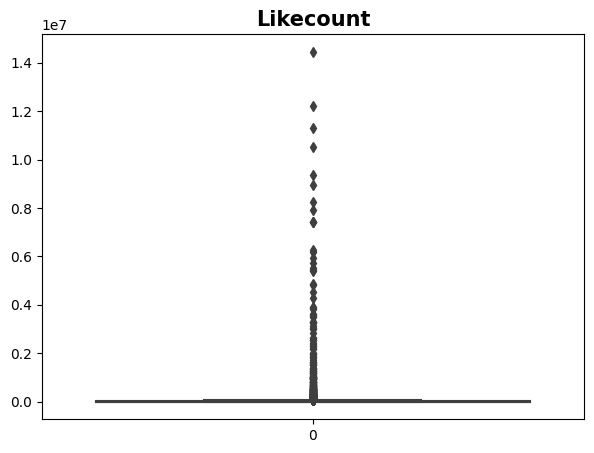

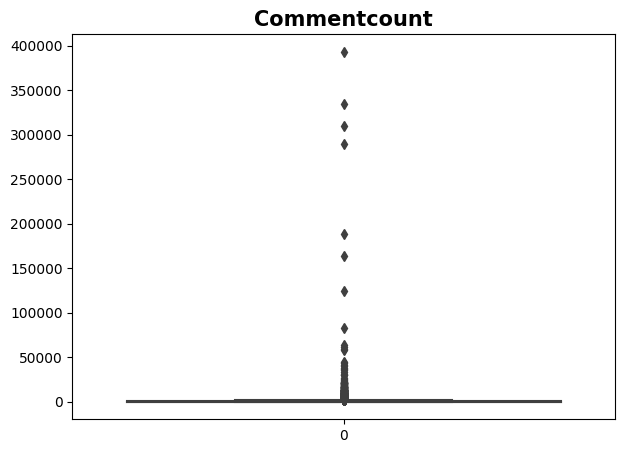

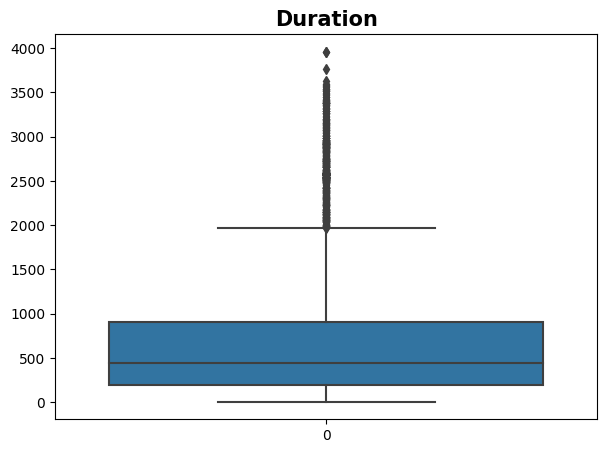

In [87]:
for col in numerical_columns:
    set_labels(title=col.capitalize())
    sns.boxplot(df[col])
    plt.show()

In [ ]:
def detect_outlier():
    

In [28]:
## selected columns
print(f"Columns Selected:\n{df.columns}")
print(f"no of columns: {df.shape[1]}")

Columns Selected:
Index(['publicstatsviewable', 'madeforkids', 'viewcount', 'likecount',
       'commentcount', 'duration', 'caption', 'licensedcontent'],
      dtype='object')
no of columns: 8


## Data Pipeline

In [29]:
## pipe line
def data_pipeline(categorical_columns,numerical_columns,X_train,X_test=None,split=False):


    numerical_transformer = Pipeline(steps=[
            ('imputation',SimpleImputer(strategy='mean')),
            ('standardization',StandardScaler())
    ])

    categorical_transformer  = Pipeline(steps=[
        ('imputation',SimpleImputer(strategy='most_frequent')),
        ('encoding',OneHotEncoder())
    ])

    pipeline = ColumnTransformer([
        ('numerical',numerical_transformer,numerical_columns),
        ('categorical',categorical_transformer,categorical_columns)
    ]) 
    X_train = pipeline.fit_transform(X_train)
    if split:
        X_test = pipeline.transform(X_test)
        return [X_train,X_test]
    return X_train

## Data transformation for clustering

In [30]:
X = df[categorical_columns+numerical_columns]
X_transform = data_pipeline(categorical_columns,numerical_columns,X_train=X)


print(f"shape of data before tranformation: {X.shape}")

print(f"shape of data after transformation: {X_transform.shape}")

shape of data before tranformation: (4420, 8)
shape of data after transformation: (4420, 12)


## Observation
- Using ***PCA (Principal component analysis)*** for transforming our data to 2 dimension which could be ploted on a scatterplot for analysis of clusters.

## PCA

In [32]:

X_2d = PCA(n_components=2,random_state=0).fit_transform(X_transform)
print(f"shape of X_2d: {X_2d.shape}")
print(f"type of X_2d: {type(X_2d)}")


X_2d = pd.DataFrame(X_2d)

shape of X_2d: (4420, 2)
type of X_2d: <class 'numpy.ndarray'>


## Clustering

### KMeans

In [34]:
## no of clusters = 3

kmeans = KMeans(n_clusters=3,random_state=0)

kmeans.fit(X_transform)
X_2d['c'] = kmeans.predict(X_transform)

/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: title={'center': 'No of clusters=3'}, xlabel='0', ylabel='1'>

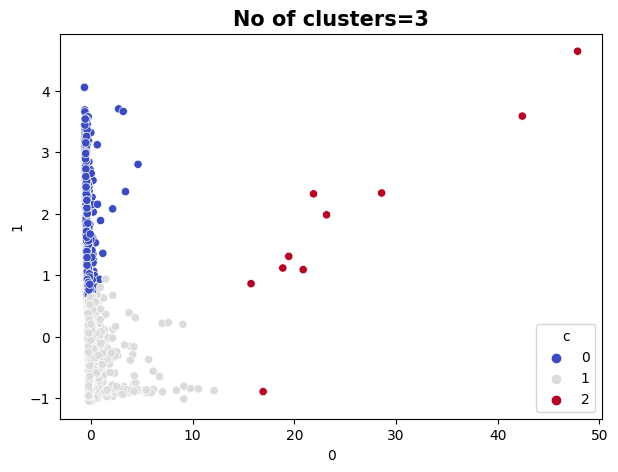

In [35]:
set_labels(title='No of clusters=3')
sns.scatterplot(x=0,y=1,data=X_2d,hue='c',palette='coolwarm')

## Observation
- ***KMeans*** algorithm is very sensitive to outlier as it uses Euclidean distance to measure distance between points and form clusters.

- As seen above, the extereme values are classified as a seperate group. 

/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input

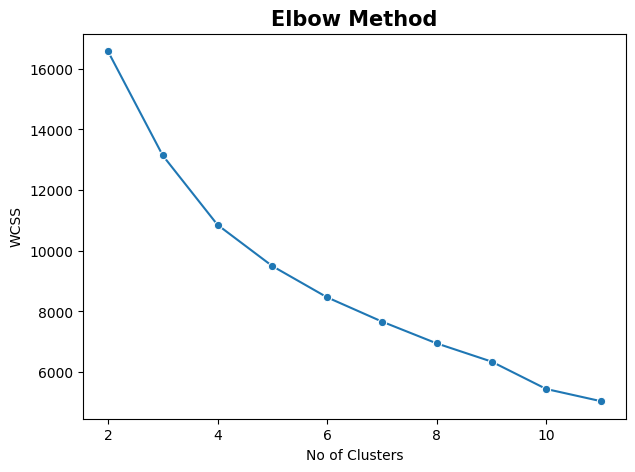

In [58]:
def no_of_clusters(data,min_cluster=2,max_cluster=8):
    wcss = []
    for i in range(min_cluster,max_cluster):
        km = KMeans(n_clusters=i,random_state=0,init = 'k-means++',verbose=0).fit(data)
        
        wcss.append(km.inertia_)
    ## ploting 
    
    set_labels(title='Elbow Method',xlabel='No of Clusters',ylabel='WCSS')
    sns.lineplot(x=np.arange(min_cluster,max_cluster),y=wcss,marker='o')

no_of_clusters(data=X_transform,max_cluster=12)
    

In [83]:
## no of clusters = 9

range_in_eps = [1]
range_n_clusters = [2,3,4,5,6,7,8,9]

/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.9862966728206325


/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : -0.31205776225334897


/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : -0.25747208457920345


/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : -0.21569000198973268


/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : -0.18767511759982133


/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : -0.24878227236045342


/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : -0.15778081139188452


/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/YouTube_analysis/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : -0.0885772352738172


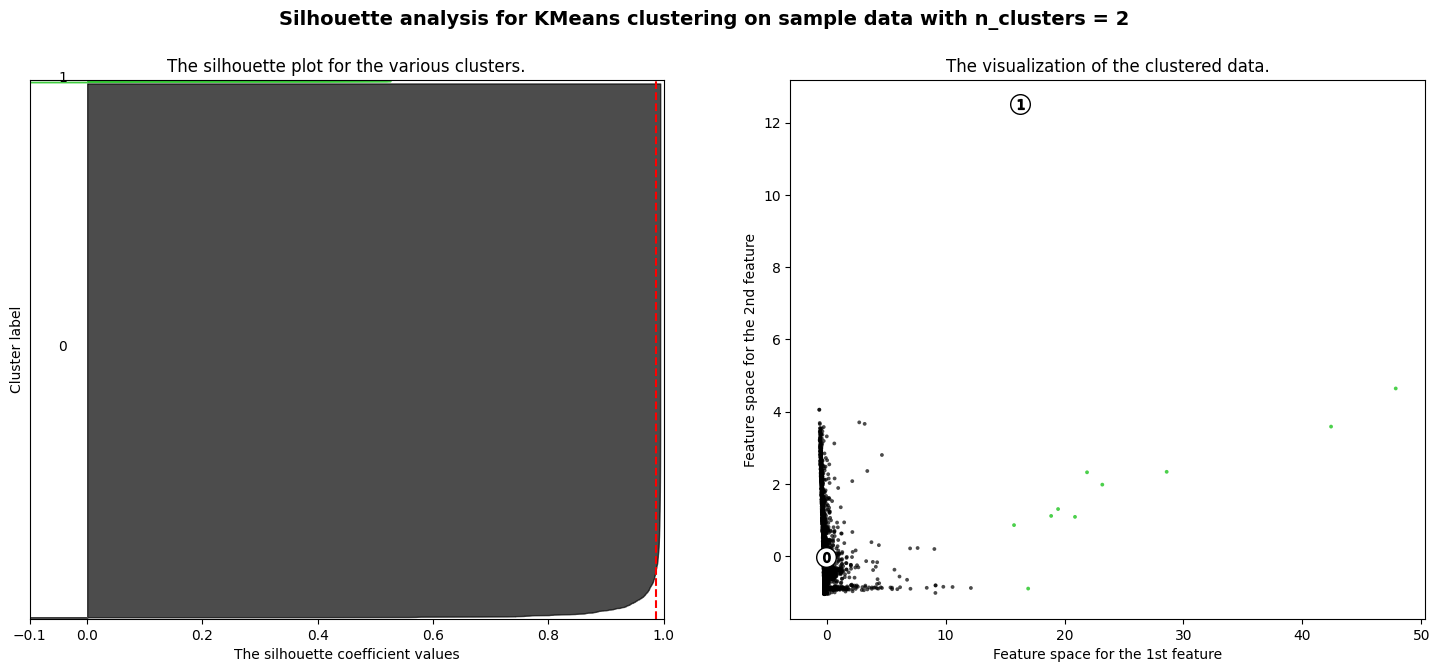

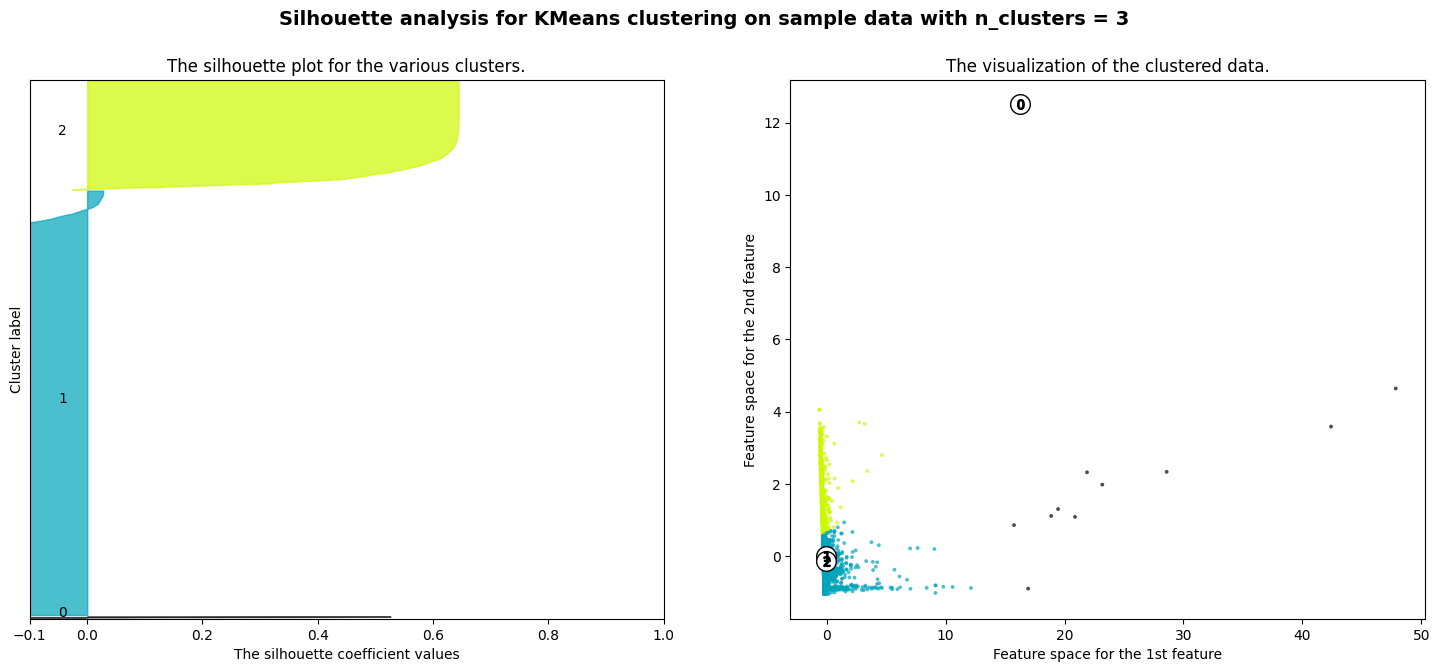

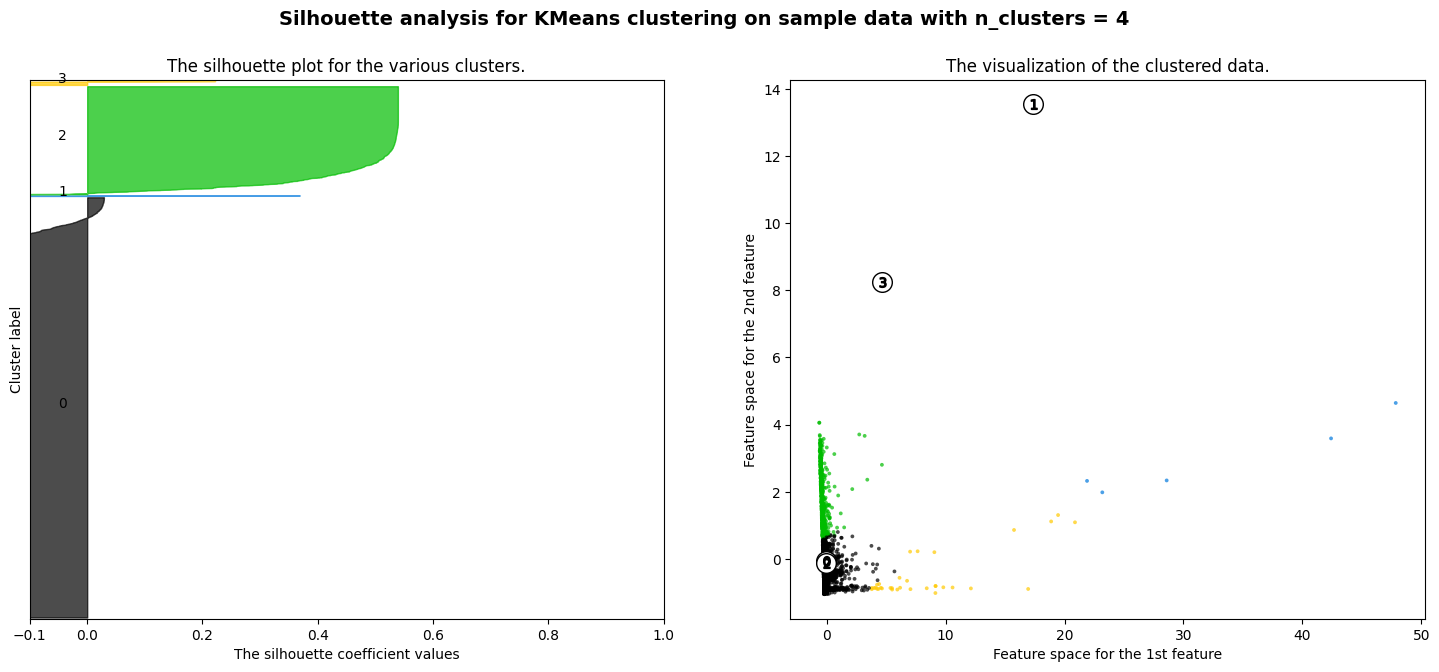

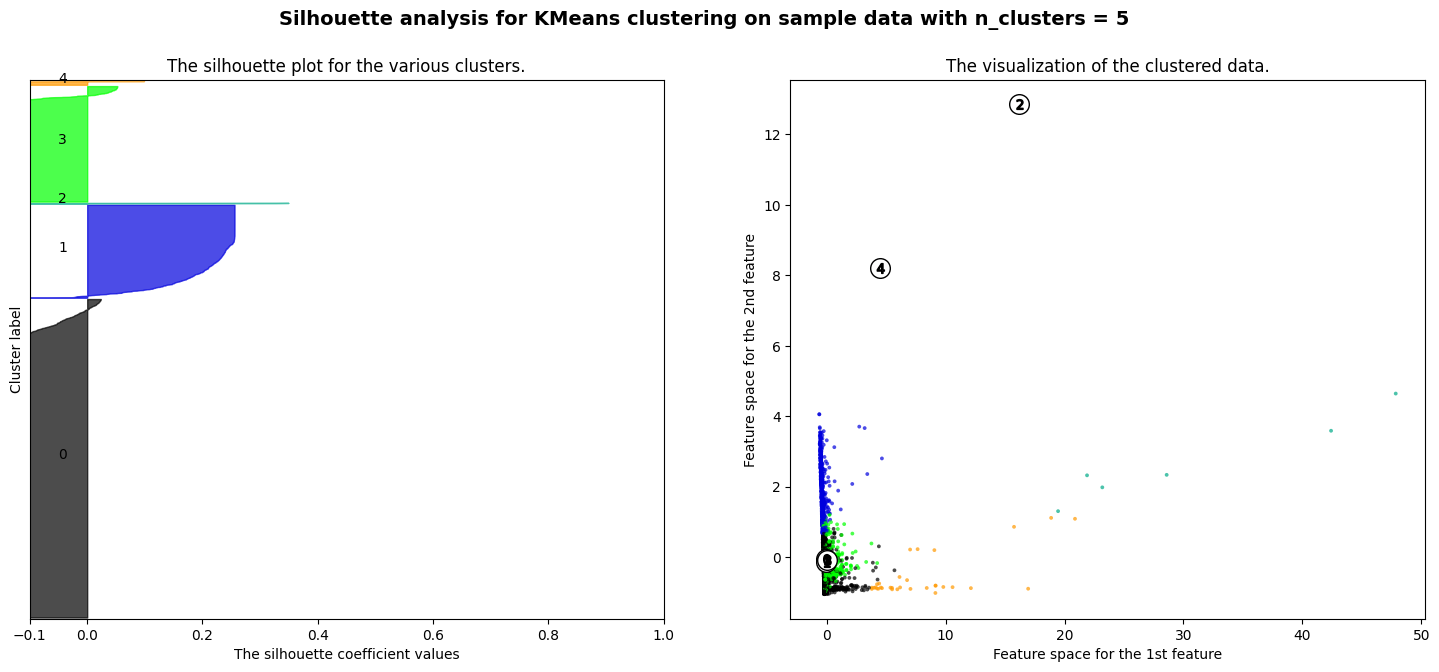

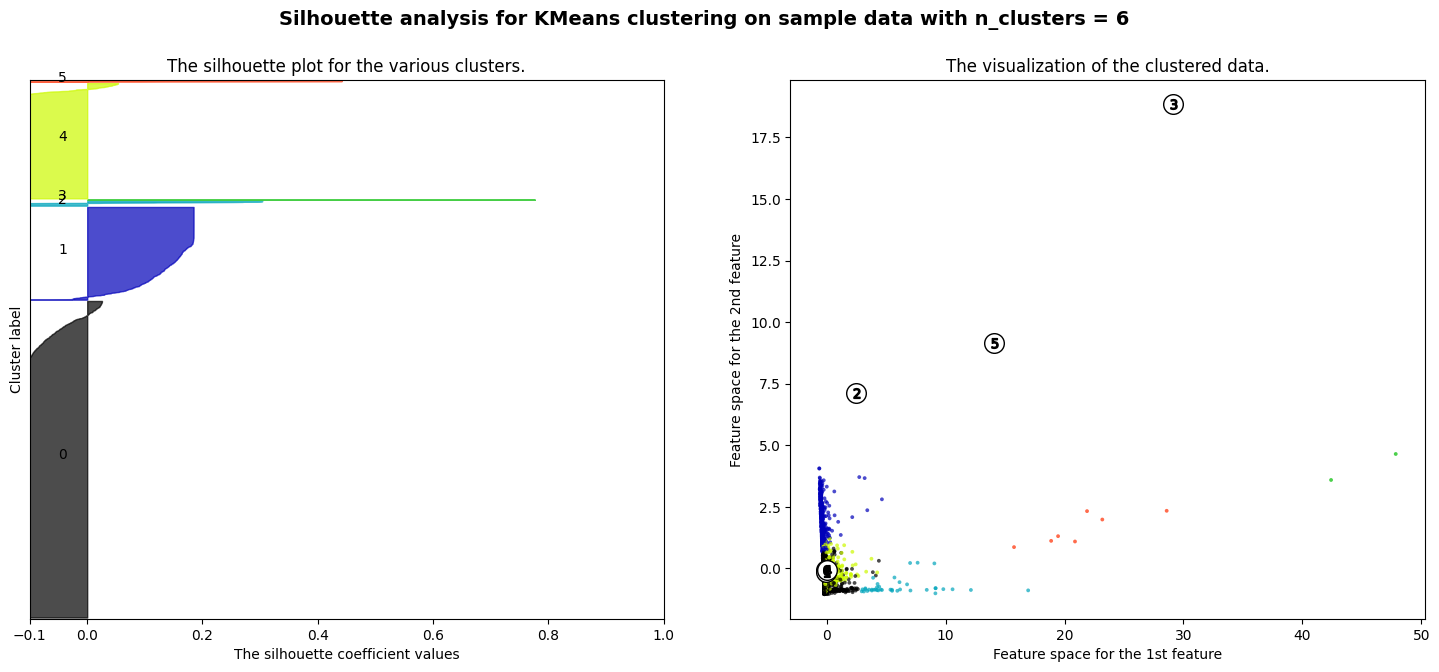

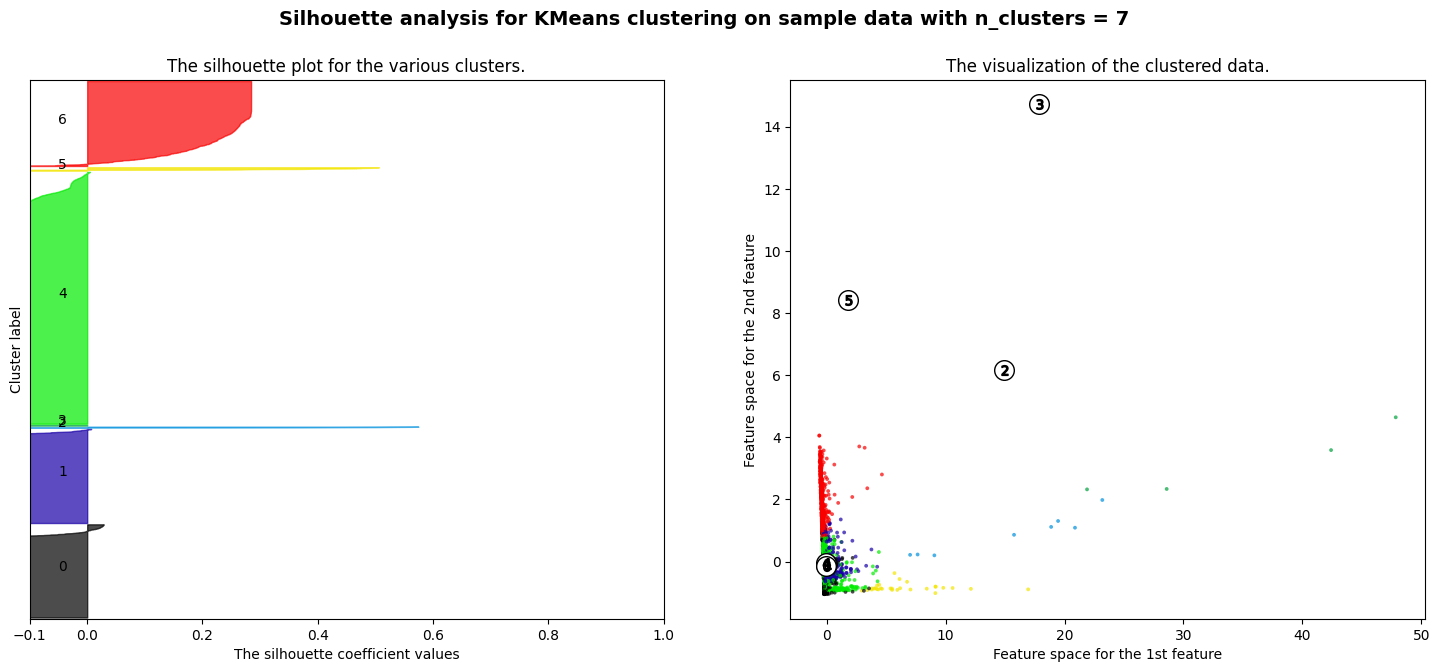

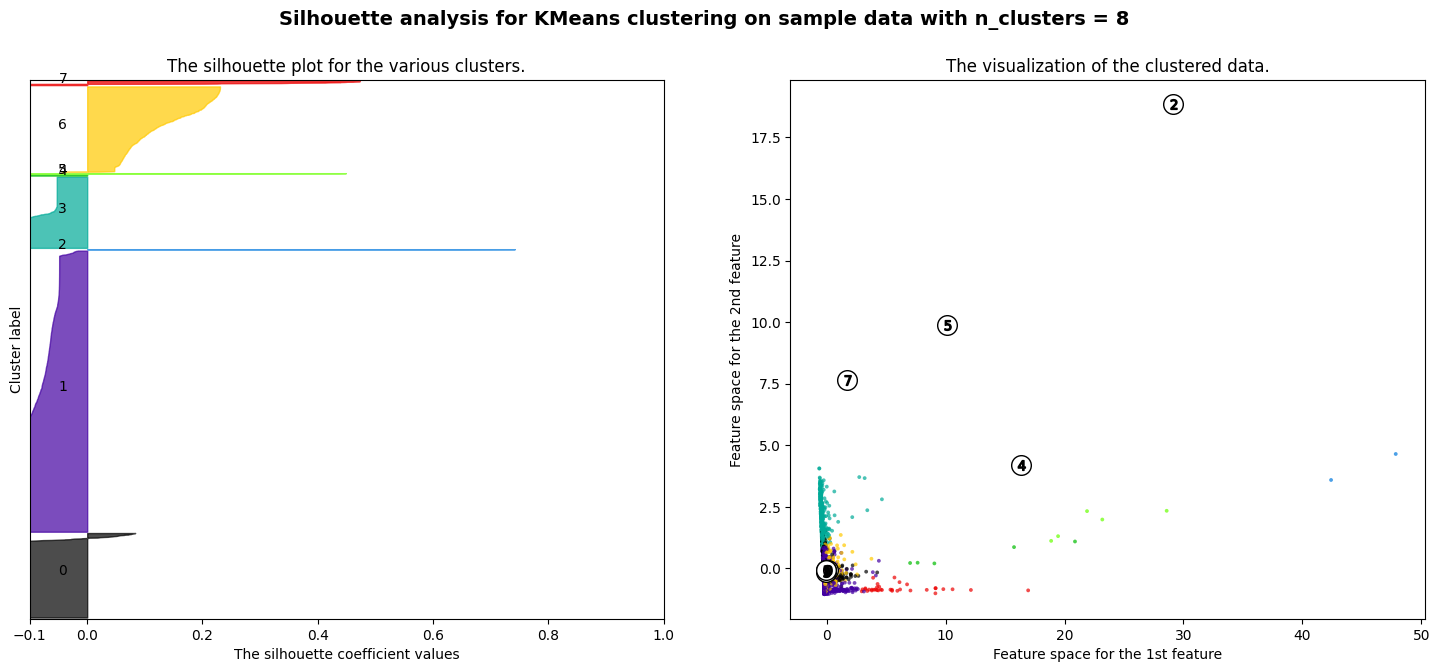

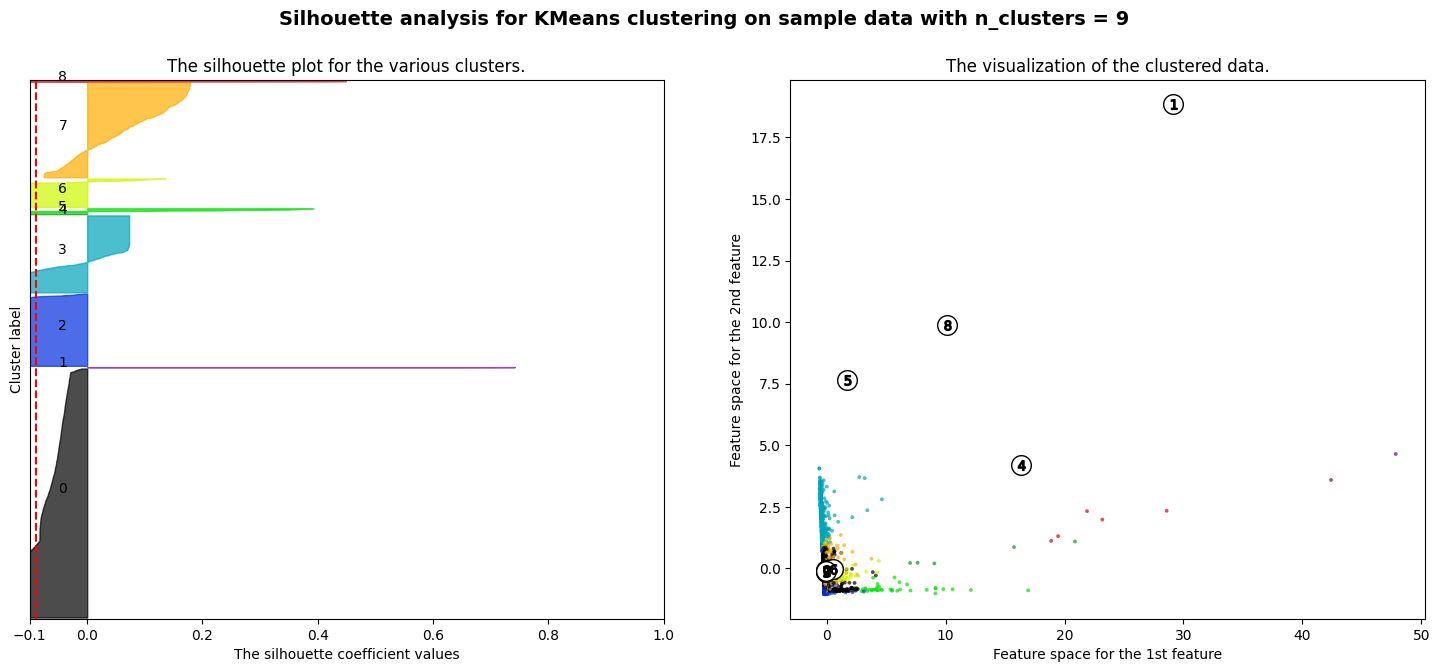

In [84]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_transform)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_2d[0],X_2d[1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Observation
- We see that due to outliers

### DBScan

In [37]:
from sklearn.cluster import DBSCAN

In [53]:
dbscan = DBSCAN(eps=0.8,min_samples=20)
X_2d['c'] = dbscan.fit_predict(X_transform)

<Axes: title={'center': 'No of clusters=3'}, xlabel='0', ylabel='1'>

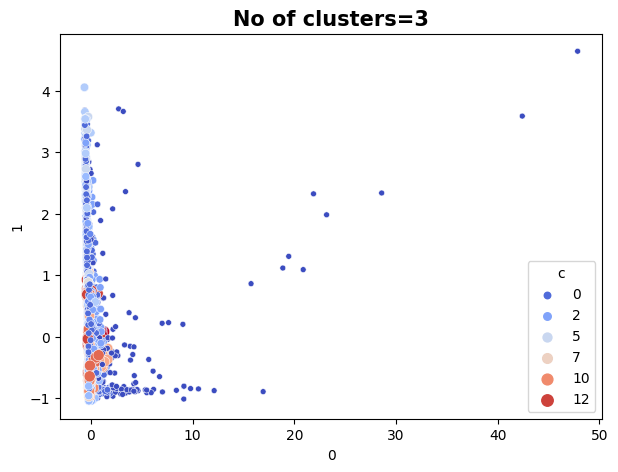

In [54]:
set_labels(title='No of clusters=3')
sns.scatterplot(x=0,y=1,data=X_2d,hue='c',palette='coolwarm',size='c')